## Ridge Regression <br>
### Predicting Closing price

Niranjan Kumar - 20BAI1010

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We imported the necessary libraries to run this code, now we import the csv dataset,

In [2]:
df=pd.read_csv("stock_data.csv")
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,25-January-2022,491.35,517.55,489.45,514.85,506.664435,921453,18415,466867464.0,181143.0,19.66,28.10,23.50
1,24-January-2022,502.10,506.65,488.05,494.10,497.524783,1283253,30605,638450170.0,457865.0,35.68,18.60,-8.00
2,21-January-2022,506.50,507.40,498.05,502.80,503.077040,747603,19457,376101904.0,257255.0,34.41,9.35,-3.70
3,20-January-2022,515.35,518.90,508.00,511.55,514.572635,823123,16434,423556571.0,293847.0,35.70,10.90,-3.80
4,19-January-2022,506.75,517.50,500.45,515.90,508.646935,702233,10629,357188663.0,145050.0,20.66,17.05,9.15


### Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21012 entries, 0 to 21011
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       21012 non-null  object 
 1   Open Price                 21012 non-null  float64
 2   High Price                 21012 non-null  float64
 3   Low Price                  21012 non-null  float64
 4   Close Price                21012 non-null  float64
 5   WAP                        21012 non-null  float64
 6   No.of Shares               21012 non-null  int64  
 7   No. of Trades              21012 non-null  int64  
 8   Total Turnover (Rs.)       21012 non-null  float64
 9   Deliverable Quantity       21000 non-null  float64
 10  % Deli. Qty to Traded Qty  21000 non-null  float64
 11  Spread High-Low            21012 non-null  float64
 12  Spread Close-Open          21012 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usa

In [4]:
df.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999680,0.999691,0.999396,0.999698,0.056368,0.379606,0.389765,0.017442,-0.446388,0.732815,-0.077431
High Price,0.999680,1.000000,0.999565,0.999760,0.999889,0.060178,0.384456,0.394512,0.019170,-0.448813,0.743180,-0.057781
Low Price,0.999691,0.999565,1.000000,0.999709,0.999845,0.055330,0.376720,0.389003,0.017520,-0.444337,0.723113,-0.059559
Close Price,0.999396,0.999760,0.999709,1.000000,0.999895,0.058720,0.381590,0.393146,0.018851,-0.447106,0.734279,-0.042739
WAP,0.999698,0.999889,0.999845,0.999895,1.000000,0.058145,0.381007,0.392208,0.018465,-0.446978,0.734220,-0.054434
No.of Shares,0.056368,0.060178,0.055330,0.058720,0.058145,1.000000,0.584028,0.716819,0.829266,-0.118381,0.154050,0.064089
No. of Trades,0.379606,0.384456,0.376720,0.381590,0.381007,0.584028,1.000000,0.733633,0.309888,-0.237080,0.457342,0.034129
Total Turnover (Rs.),0.389765,0.394512,0.389003,0.393146,0.392208,0.716819,0.733633,1.000000,0.665111,-0.133771,0.414217,0.073564
Deliverable Quantity,0.017442,0.019170,0.017520,0.018851,0.018465,0.829266,0.309888,0.665111,1.000000,0.073211,0.051459,0.039390
% Deli. Qty to Traded Qty,-0.446388,-0.448813,-0.444337,-0.447106,-0.446978,-0.118381,-0.237080,-0.133771,0.073211,1.000000,-0.430653,0.006254


We obtain the co-relation between different columns to select features which co-relate with close price. The features whose co-relation with close price is close to -1 or 1 is chosen to predict the close price.

<AxesSubplot:>

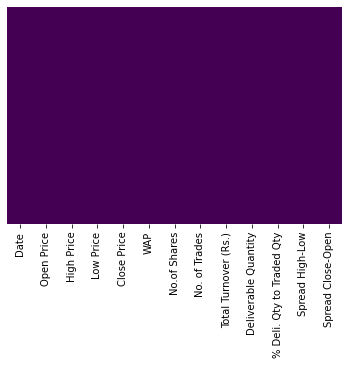

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False,cmap='viridis')

<AxesSubplot:>

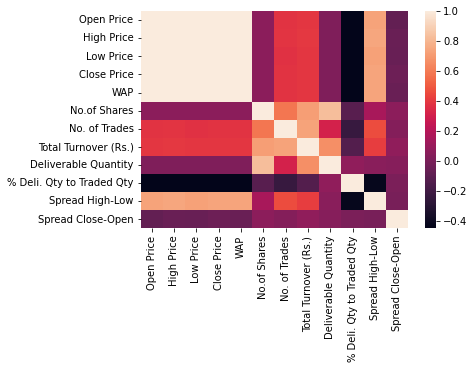

In [6]:
sns.heatmap(df.corr())  #Heatmap is used to visualise the data

In this case, we notice that Open Price , High Price , Low Price , WAP , Spread High-Low columns co-relate well with Close price hence we choose these columns and drop the other columns.

In [7]:
df.drop(['Date', 'No.of Shares','No. of Trades','Total Turnover (Rs.)','Deliverable Quantity','% Deli. Qty to Traded Qty','Spread Close-Open'],inplace=True, axis = 1)

We use the lambda method of normalization to ensure that all the data is in between the same range of values, this is important so that the model gives equal weightage to all the inputs.

In [8]:
df=df.apply(lambda x:(x-x.min(axis=0))/(x.max(axis=0)- x.min(axis=0)))

In [9]:
X=df[['Open Price','High Price','Low Price','WAP','Spread High-Low']] 
Y=df[['Close Price']]


In [10]:
df

,Open Price,High Price,Low Price,Close Price,WAP,Spread High-Low
0,0.436515,0.451389,0.445079,0.453215,0.447106,0.301826
1,0.446195,0.441753,0.443790,0.434708,0.438931,0.199785
2,0.450158,0.442416,0.452999,0.442467,0.443897,0.100430
3,0.458127,0.452583,0.462163,0.450272,0.454179,0.117078
4,0.450383,0.451345,0.455209,0.454151,0.448879,0.183136
...,...,...,...,...,...,...
21007,0.048987,0.048120,0.049713,0.048288,0.048327,0.013426
21008,0.050698,0.049623,0.050082,0.048288,0.048946,0.027390
21009,0.051598,0.050772,0.051601,0.050116,0.050788,0.023631
21010,0.051598,0.051258,0.052798,0.050964,0.051504,0.015575


### Implementation of the Model

Now, we implement the Ridge Regression model by importing the appropriate library, splitting the dataset into testing and training. We fit the model using the training set.

In [11]:
from sklearn.linear_model import Ridge
ridge=Ridge()  # Initialising the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101) #Test_size = 0.3 says that the testset is 30% of the data and 70% of the data goes for training
ridge.fit(X_train,Y_train) # Fit function is used to train the model
ridge.coef_         # Printing the coefficients of the regression equation

array([[0.21442079, 0.24949844, 0.25916749, 0.2612416 , 0.0086287 ]])

Now, we provide the input from the test dataset to the model and ask it to make the predictions

In [12]:
Y_pred=ridge.predict(X_test)
Y_pred.shape

(6304, 1)

In [13]:
ridge.intercept_        # Gives the intercept value in the regression equation

array([-2.63509418e-05])

### Finding Performance metrics

Now, we calculate the mean absolute error, mean squared error and the root mean square error between the predictions and the actual values from the testing set.

In [15]:
from sklearn import metrics
print('MAE: ',round(metrics.mean_absolute_error(Y_test,Y_pred),4))
print('MSE: ',round(metrics.mean_squared_error(Y_test,Y_pred),4))
print('RMSE: ',round(metrics.median_absolute_error(Y_test,Y_pred),4))

MAE:  0.001
MSE:  0.0
RMSE:  0.0004


We get really small values, hence, error is very minimal in the predictions

In [16]:
from statsmodels.api import OLS
OLS(Y_test,Y_pred).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Close Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.234e+07
Date:                Mon, 02 May 2022   Prob (F-statistic):                        0.00
Time:                        22:31:05   Log-Likelihood:                          30814.
No. Observations:                6304   AIC:                                 -6.163e+04
Df Residuals:                    6303   BIC:                                 -6.162e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0016      0.000   5686.861      0.000       1.001       1.002
==============================================================================
Omnibus:                     1483.000   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79161.604
Skew:                           0.159   Prob(JB):                         0.00
Kurtosis:                      20.357   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

0.9996093419344024


Let us visualise the predictions v/s actual values,

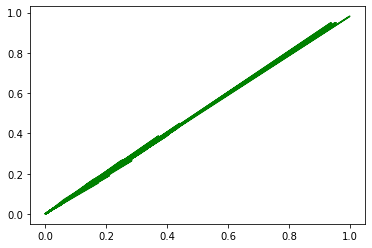

In [17]:
plt.plot(Y_test,Y_pred,color="green")

We notice that the line for the predictions and the line for the actual values almost lie on each other, hence the model's predictions are highly accurate.